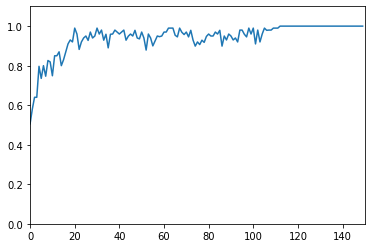

In [ ]:
# Implementation of Fungal Pandemic Ant Colony algorithm based on code on Stack Overflow
# https://stackoverflow.com/questions/65309403/on-the-implementation-of-a-simple-ant-colony-algorithm
# Modified for our specific use case

import random
import matplotlib.pyplot as plt

N = 10
save=10
l1 = 1.1
l2 = 1.5
ru = 0.05
Q = 1
tau1 = 0.5
tau2 = 0.5

samples = 10
epochs = 150

success1 = [0 for x in range(epochs)]

def compute_probability(tau1, tau2):
    return tau1/(tau1 + tau2), tau2/(tau1 + tau2)

def weighted_random_choice(choices):
    max = sum(choices.values())
    pick = random.uniform(0, max)
    current = 0
    for key, value in choices.items():
        current += value
        if current > pick:
            return key


def select_path(prob1, prob2):
    choices = {1: prob1, 2: prob2}
    return weighted_random_choice(choices)

def update_accumulation(link_id, infected=False):
    global tau1
    global tau2
    if infected:
        # Infected ant behavior: ignore path and head towards colony
        tau1 += Q / l1
        tau2 += Q / l2
    else:
        if link_id == 1:
            tau1 += Q / l1
        else:
            tau2 += Q / l2

def update_evaporation():
    global tau1
    global tau2
    tau1 *= (1-ru)
    tau2 *= (1-ru)

def report_results(success1):
    plt.ylim(0.0, 1.1)
    plt.xlim(0, 150)
    plt.plot(success1)
    plt.show()

for sample in range(samples):
    for epoch in range(epochs):
        temp = 0
        N=save
        for ant in range(N):
            prob1, prob2 = compute_probability(tau1, tau2)
            if random.random() < 0.01:
                # 1% chance for ant to be infected
                update_accumulation(1, infected=True)
                N=N-1;
            else:
                selected_path = select_path(prob1, prob2)
                if selected_path == 1:
                    temp += 1
                update_accumulation(selected_path)
            update_evaporation()
        ratio = ((temp + 0.0) / N)
        success1[epoch] += ratio
    # reset pheromone values here to evaluate new sample
    tau1 = 0.5
    tau2 = 0.5

success1 = [x / samples for x in success1]

# for x in success1:
#     print(x)



arr = success1

found_one = False
for i in range(len(arr)):
    if arr[i] == 1:
        found_one = True
    if found_one:
        arr[i] = 1



report_results(arr)
